# Univariate and Multivariate Gaussian

$f(x \vert \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$

In [299]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [300]:
def uni_normal(x,mu=0,sigma=1):
    N = 1.0 / (math.sqrt( 2 * math.pi * sigma**2 ))
    exponent = -(x - mu)**2 / (2*sigma**2)
    E = np.exp(exponent)
    return N * E

In [301]:
uni_normal(0)

0.3989422804014327

In [302]:
x = np.arange(-4,4, 0.1)

In [303]:
uni_normal(x)

array([1.33830226e-04, 1.98655471e-04, 2.91946926e-04, 4.24780271e-04,
       6.11901930e-04, 8.72682695e-04, 1.23221917e-03, 1.72256894e-03,
       2.38408820e-03, 3.26681906e-03, 4.43184841e-03, 5.95253242e-03,
       7.91545158e-03, 1.04209348e-02, 1.35829692e-02, 1.75283005e-02,
       2.23945303e-02, 2.83270377e-02, 3.54745928e-02, 4.39835960e-02,
       5.39909665e-02, 6.56158148e-02, 7.89501583e-02, 9.40490774e-02,
       1.10920835e-01, 1.29517596e-01, 1.49727466e-01, 1.71368592e-01,
       1.94186055e-01, 2.17852177e-01, 2.41970725e-01, 2.66085250e-01,
       2.89691553e-01, 3.12253933e-01, 3.33224603e-01, 3.52065327e-01,
       3.68270140e-01, 3.81387815e-01, 3.91042694e-01, 3.96952547e-01,
       3.98942280e-01, 3.96952547e-01, 3.91042694e-01, 3.81387815e-01,
       3.68270140e-01, 3.52065327e-01, 3.33224603e-01, 3.12253933e-01,
       2.89691553e-01, 2.66085250e-01, 2.41970725e-01, 2.17852177e-01,
       1.94186055e-01, 1.71368592e-01, 1.49727466e-01, 1.29517596e-01,
      

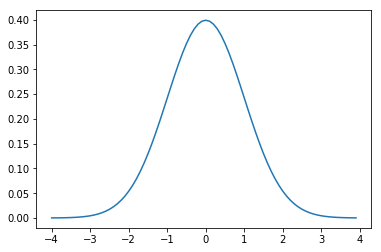

In [304]:
plt.plot(x, uni_normal(x))

In [305]:
def multi_normal(x, Sigma, Mu):
    p = len(Mu)
    N = 1.0 / math.sqrt(((2 * math.pi)**p * np.linalg.det(Sigma)))
    exponent = - 0.5 * np.transpose(x - Mu) @ np.linalg.inv(Sigma) @ (x - Mu)
    E = np.exp(exponent)
    return N * E

In [306]:
def multi_normal(x, Sigma, Mu):
    p = len(Mu)
    N = 1.0 / math.sqrt(((2 * math.pi)**p * np.linalg.det(Sigma)))
    exponent = - 0.5 * np.transpose(x - Mu) @ np.linalg.inv(Sigma) @ (x - Mu)
    E = np.exp(exponent)
    return N * E


def normal_dist(x, Sigma, Mu):
    if len(x.shape) == 1 and len(Mu) == 1:
        return uni_normal(x, Sigma, Mu)
    if len(x.shape) == 1:
        return multi_normal(x, Sigma, Mu)
    return [multi_normal(a, Sigma, Mu) for a in x]
    vfunc = np.vectorize(lambda a: multi_normal(a, Sigma, Mu))
    return vfunc(x)
        

In [307]:
normal_dist(np.array([1,1]), np.array([[1,0],[0,1]]), np.array([0,0]))

0.05854983152431917

In [10]:
x_vec = np.array([[0,0],[1,1],[2,2]])
Sigma = np.array([[1,0],[0,1]])
Mu = np.array([0,0])

In [11]:
normal_dist(x_vec, Sigma, Mu)

[0.15915494309189535, 0.05854983152431917, 0.0029150244650281935]

In [12]:
np.linalg.det(np.mat([[1,0],[0,1]]))

1.0

In [13]:
np.dot([1,1],[1,1])

2

In [14]:
X,Y = np.mgrid[-5:5.1:0.5, -5:5.1:0.5]

In [15]:
import scipy.integrate as integrate

In [16]:
xy = np.mgrid[-5:5.1:0.5, -5:5.1:0.5].reshape(2,-1).T

In [17]:
xyz = [xy, normal_dist(xy, Sigma, Mu)]

In [18]:
import seaborn as sns

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame(data=xy, columns=['x', 'y'])

In [21]:
df['f'] = normal_dist(xy, Sigma, Mu)

In [22]:
df.tail()

,x,y,f
436,5.0,3.0,6.588916e-09
437,5.0,3.5,1.297434e-09
438,5.0,4.0,1.989680e-10
439,5.0,4.5,2.376334e-11
440,5.0,5.0,2.210335e-12


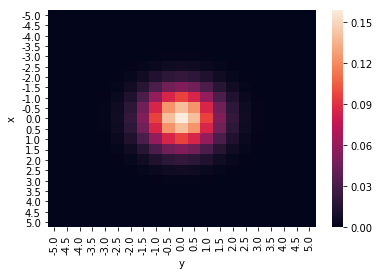

In [24]:
sns.heatmap(df.pivot(index='x', columns='y', values='f'))

In [170]:
df[df.f > 0].head()

,x,y,f
0,-5.0,-5.0,2.210335e-12
1,-5.0,-4.5,2.376334e-11
2,-5.0,-4.0,1.989680e-10
3,-5.0,-3.5,1.297434e-09
4,-5.0,-3.0,6.588916e-09


In [40]:
integrate.nquad(norm.pdf, [[-np.inf, np.inf]])

(0.9999999999999998, 1.0178191320905743e-08)

## Inverse sampling Method
https://en.wikipedia.org/wiki/Inverse_transform_sampling
smirnov transform

In [32]:
s = np.random.uniform(0,1,10000)

(array([1010., 1028.,  970., 1033.,  959., 1015.,  950., 1033., 1017.,
         985.]),
 array([1.20163451e-04, 1.00071412e-01, 2.00022661e-01, 2.99973910e-01,
        3.99925159e-01, 4.99876408e-01, 5.99827657e-01, 6.99778906e-01,
        7.99730154e-01, 8.99681403e-01, 9.99632652e-01]),
 <a list of 10 Patch objects>)

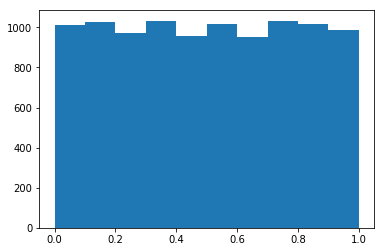

In [33]:
plt.hist(s)

In [8]:
from scipy.stats import norm

In [9]:
norm.cdf(1)

0.8413447460685429

In [10]:
# pdf
norm.pdf(0)

0.3989422804014327

(array([  20.,  157.,  713., 1927., 2895., 2583., 1269.,  381.,   48.,
           7.]),
 array([-3.58709006, -2.83022791, -2.07336576, -1.31650361, -0.55964146,
         0.19722069,  0.95408284,  1.71094499,  2.46780714,  3.22466929,
         3.98153144]),
 <a list of 10 Patch objects>)

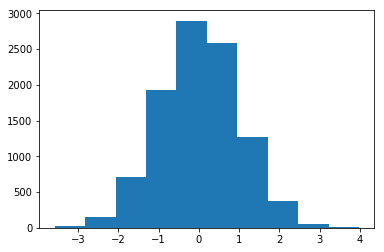

In [11]:
plt.hist(norm.rvs(size=10000))

In [12]:
#norm.pdf()

In [26]:
sample = np.random.uniform(0,1,10000)

(array([  11.,   91.,  456., 1490., 2807., 2843., 1628.,  547.,  110.,
          17.]),
 array([-3.91867707, -3.14505694, -2.37143681, -1.59781669, -0.82419656,
        -0.05057643,  0.7230437 ,  1.49666382,  2.27028395,  3.04390408,
         3.8175242 ]),
 <a list of 10 Patch objects>)

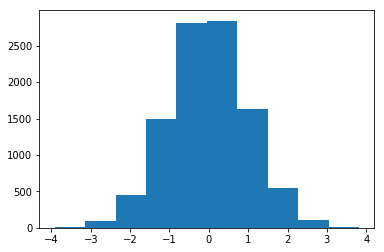

In [14]:
plt.hist(norm.ppf(sample))

In [15]:
x = np.linspace(-10,10,1000)
x[:5]

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992])

In [16]:
pdf = norm.pdf(x)

In [17]:
pdf[:5]

array([7.69459863e-23, 9.39820210e-23, 1.14743878e-22, 1.40036163e-22,
       1.70834985e-22])

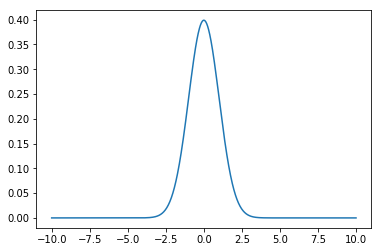

In [18]:
plt.plot(x,pdf)

In [19]:
cdf = norm.cdf(x)

In [72]:
from matplotlib import pyplot as plt
import matplotlib

Text(0, 0.5, 'P(X>x)')

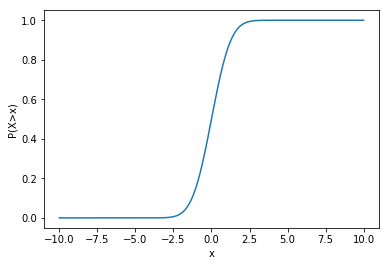

In [22]:
plt.plot(x, cdf)
#plt.xlabel = matplotlib.pyplot.xlabel
plt.xlabel('x')
plt.ylabel('P(X>x)')
#plt.show()

In [32]:
ppf = norm.ppf(x)

Text(0, 0.5, 'Q(p) = x')

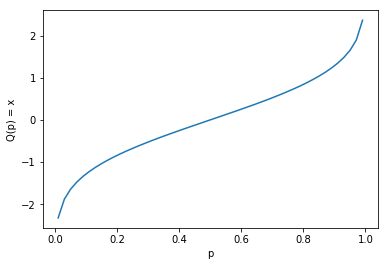

In [35]:
plt.plot(x,ppf)
plt.xlabel('p')
plt.ylabel('Q(p) = x')

In [31]:
sample

array([0.12750917, 0.22154261, 0.33887132, ..., 0.37433378, 0.80658585,
       0.74844797])

In [36]:
from scipy.stats import multivariate_normal

In [39]:
sigma_1 = np.array([[1,0],[0,1]])
sigma_2 = np.array([[1,0.4],[0.4,1]])
mu = np.array([0,0])

In [46]:
np.mgrid[]

In [41]:
x,y = np.mgrid[-1:1:.01, -1:1:.01]

In [55]:
xy = np.mgrid[-5:5.1:0.5, -5:5.1:0.5]#
#.reshape(2,-1).T
xy.shape

(2, 21, 21)

In [45]:
xy

array([[-5. , -5. ],
       [-5. , -4.5],
       [-5. , -4. ],
       [-5. , -3.5],
       [-5. , -3. ],
       [-5. , -2.5],
       [-5. , -2. ],
       [-5. , -1.5],
       [-5. , -1. ],
       [-5. , -0.5],
       [-5. ,  0. ],
       [-5. ,  0.5],
       [-5. ,  1. ],
       [-5. ,  1.5],
       [-5. ,  2. ],
       [-5. ,  2.5],
       [-5. ,  3. ],
       [-5. ,  3.5],
       [-5. ,  4. ],
       [-5. ,  4.5],
       [-5. ,  5. ],
       [-4.5, -5. ],
       [-4.5, -4.5],
       [-4.5, -4. ],
       [-4.5, -3.5],
       [-4.5, -3. ],
       [-4.5, -2.5],
       [-4.5, -2. ],
       [-4.5, -1.5],
       [-4.5, -1. ],
       [-4.5, -0.5],
       [-4.5,  0. ],
       [-4.5,  0.5],
       [-4.5,  1. ],
       [-4.5,  1.5],
       [-4.5,  2. ],
       [-4.5,  2.5],
       [-4.5,  3. ],
       [-4.5,  3.5],
       [-4.5,  4. ],
       [-4.5,  4.5],
       [-4.5,  5. ],
       [-4. , -5. ],
       [-4. , -4.5],
       [-4. , -4. ],
       [-4. , -3.5],
       [-4. , -3. ],
       [-4. ,

In [152]:
xvalues = np.array([0, 1, 2, 3, 4, 5])
yvalues = np.array([0, 1, 2, 3, 4, 5])

In [153]:
xy = np.outer(xvalues, yvalues)

In [154]:
# inference
xvalues.reshape((-1,2))

array([[0, 1],
       [2, 3],
       [4, 5]])

In [155]:
xy = np.mgrid[0:3:1, 0:3:1]#

In [156]:
xy

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

In [157]:
xy.shape

(2, 3, 3)

In [158]:
xy.reshape((2,-1)).T

array([[0, 0],
       [0, 1],
       [0, 2],
       [1, 0],
       [1, 1],
       [1, 2],
       [2, 0],
       [2, 1],
       [2, 2]])

In [159]:
x = np.arange(0,10,2)

xy = [[x1,y1], [x1,y2], ...[xn,y1]..[xn,yn]]

In [160]:
import itertools

In [161]:
xy = np.array([element for element in itertools.product(x, x)])

In [162]:
xy

array([[0, 0],
       [0, 2],
       [0, 4],
       [0, 6],
       [0, 8],
       [2, 0],
       [2, 2],
       [2, 4],
       [2, 6],
       [2, 8],
       [4, 0],
       [4, 2],
       [4, 4],
       [4, 6],
       [4, 8],
       [6, 0],
       [6, 2],
       [6, 4],
       [6, 6],
       [6, 8],
       [8, 0],
       [8, 2],
       [8, 4],
       [8, 6],
       [8, 8]])

In [163]:
bivariate_gauss_1 = multivariate_normal(mean=mu, cov=sigma_1)

In [164]:
z = bivariate_gauss_1.pdf(xy)

In [165]:
x,y = xy.T

In [166]:
x

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 8, 8,
       8, 8, 8])

In [167]:
y

array([0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2,
       4, 6, 8])

In [112]:
#plt.imshow(x,y,z)

In [113]:
a = zip(x,y,z)

In [129]:
Y

array([[-30. , -30. , -30. , ..., -30. , -30. , -30. ],
       [-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
       [-29. , -29. , -29. , ..., -29. , -29. , -29. ],
       ...,
       [ 28.5,  28.5,  28.5, ...,  28.5,  28.5,  28.5],
       [ 29. ,  29. ,  29. , ...,  29. ,  29. ,  29. ],
       [ 29.5,  29.5,  29.5, ...,  29.5,  29.5,  29.5]])

In [130]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

In [133]:
import pandas as pd

array([-6.        , -5.5862069 , -5.17241379, -4.75862069, -4.34482759,
       -3.93103448, -3.51724138, -3.10344828, -2.68965517, -2.27586207,
       -1.86206897, -1.44827586, -1.03448276, -0.62068966, -0.20689655,
        0.20689655,  0.62068966,  1.03448276,  1.44827586,  1.86206897,
        2.27586207,  2.68965517,  3.10344828,  3.51724138,  3.93103448,
        4.34482759,  4.75862069,  5.17241379,  5.5862069 ,  6.        ])

In [138]:
pd.DataFrame(data=list(zip(x,y,z)), columns=['x','y','z']).pivot(index='x', columns='y', values='z')

y,-6.0,-5.586206896551724,-5.172413793103448,-4.758620689655173,-4.344827586206897,-3.9310344827586206,-3.5172413793103448,-3.103448275862069,-2.689655172413793,-2.2758620689655173,...,0.2068965517241379,0.6206896551724137,1.0344827586206895,1.4482758620689653,1.862068965517241,2.275862068965518,2.6896551724137936,3.1034482758620694,3.517241379310345,3.931034482758621
x,,,,,,,,,,,,,,,,,,,,,
-6.000000,0.159155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5.586207,NaN,0.021539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5.172414,NaN,NaN,0.000053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4.758621,NaN,NaN,NaN,2.423927e-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4.344828,NaN,NaN,NaN,NaN,2.015565e-15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3.931034,NaN,NaN,NaN,NaN,NaN,0.021539,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3.517241,NaN,NaN,NaN,NaN,NaN,NaN,0.002915,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3.103448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000007,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2.689655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.280428e-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
X

array([[-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       ...,
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975]])

In [148]:
Z1

array([[2.26032941e-06, 2.62448729e-06, 3.04350727e-06, ...,
        3.52501805e-06, 3.04350727e-06, 2.62448729e-06],
       [2.49648953e-06, 2.89869477e-06, 3.36149413e-06, ...,
        3.89331336e-06, 3.36149413e-06, 2.89869477e-06],
       [2.75387926e-06, 3.19755213e-06, 3.70806641e-06, ...,
        4.29471655e-06, 3.70806641e-06, 3.19755213e-06],
       ...,
       [3.03401116e-06, 3.52281561e-06, 4.08526075e-06, ...,
        4.73158650e-06, 4.08526075e-06, 3.52281561e-06],
       [2.75387926e-06, 3.19755213e-06, 3.70806641e-06, ...,
        4.29471655e-06, 3.70806641e-06, 3.19755213e-06],
       [2.49648953e-06, 2.89869477e-06, 3.36149413e-06, ...,
        3.89331336e-06, 3.36149413e-06, 2.89869477e-06]])

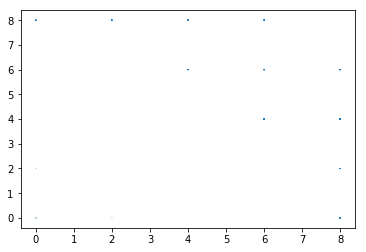

In [168]:
plt.scatter(x,y,z)

In [169]:
x.size

25

In [170]:
y.size

25

In [171]:
z.size

25

In [189]:
x = np.arange(1,10,1)
y = np.arange(1,20,4)

In [192]:
x.size

9

In [193]:
y.size

5

In [194]:
X, Y = np.meshgrid(x,y)

In [199]:
X.shape

(5, 9)

In [198]:
Y.shape

(5, 9)

In [200]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [201]:
X

array([[1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [202]:
y

array([ 1,  5,  9, 13, 17])

In [203]:
Y

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9],
       [13, 13, 13, 13, 13, 13, 13, 13, 13],
       [17, 17, 17, 17, 17, 17, 17, 17, 17]])

[X,Y] = meshgrid(x,y) returns 2-D grid coordinates based on the coordinates contained in vectors x and y. X is a matrix where each row is a copy of x, and Y is a matrix where each column is a copy of y. The grid represented by the coordinates X and Y has length(y) rows and length(x) columns.

## meshgrid

In [384]:
x = np.linspace(-2,2,1000)
y = np.linspace(-2, 2, 100)

In [385]:
print(x)
print(y)

[-2.         -1.995996   -1.99199199 -1.98798799 -1.98398398 -1.97997998
 -1.97597598 -1.97197197 -1.96796797 -1.96396396 -1.95995996 -1.95595596
 -1.95195195 -1.94794795 -1.94394394 -1.93993994 -1.93593594 -1.93193193
 -1.92792793 -1.92392392 -1.91991992 -1.91591592 -1.91191191 -1.90790791
 -1.9039039  -1.8998999  -1.8958959  -1.89189189 -1.88788789 -1.88388388
 -1.87987988 -1.87587588 -1.87187187 -1.86786787 -1.86386386 -1.85985986
 -1.85585586 -1.85185185 -1.84784785 -1.84384384 -1.83983984 -1.83583584
 -1.83183183 -1.82782783 -1.82382382 -1.81981982 -1.81581582 -1.81181181
 -1.80780781 -1.8038038  -1.7997998  -1.7957958  -1.79179179 -1.78778779
 -1.78378378 -1.77977978 -1.77577578 -1.77177177 -1.76776777 -1.76376376
 -1.75975976 -1.75575576 -1.75175175 -1.74774775 -1.74374374 -1.73973974
 -1.73573574 -1.73173173 -1.72772773 -1.72372372 -1.71971972 -1.71571572
 -1.71171171 -1.70770771 -1.7037037  -1.6996997  -1.6956957  -1.69169169
 -1.68768769 -1.68368368 -1.67967968 -1.67567568 -1

In [386]:
# create a grid of coordinates like
# (x1,y1), ... (xn, y1), ...(xn, yn)

In [387]:
# some plot functions need a matrix X, Y and Z instead of a list of tuples

In [388]:
X, Y = np.meshgrid(x,y)

In [389]:
print(X.shape)
X
# (y.size rows containt replication of the data)

(100, 1000)


array([[-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       ...,
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ]])

In [390]:
Y

array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.95959596, -1.95959596, -1.95959596, ..., -1.95959596,
        -1.95959596, -1.95959596],
       [-1.91919192, -1.91919192, -1.91919192, ..., -1.91919192,
        -1.91919192, -1.91919192],
       ...,
       [ 1.91919192,  1.91919192,  1.91919192, ...,  1.91919192,
         1.91919192,  1.91919192],
       [ 1.95959596,  1.95959596,  1.95959596, ...,  1.95959596,
         1.95959596,  1.95959596],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

In [391]:
X.shape

(100, 1000)

In [392]:
Y.shape

(100, 1000)

In [393]:
XYpairs = np.stack([ X.reshape(-1), Y.reshape(-1) ], axis=1)

In [394]:
XYpairs.shape

(100000, 2)

In [395]:
XYpairs[:,0].reshape(X.shape)

array([[-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       ...,
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ]])

In [396]:
z = bivariate_gauss_1.pdf(XYpairs).reshape(X.shape)

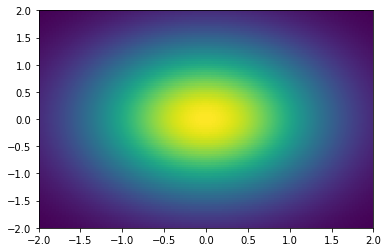

In [397]:
plt.pcolor(X,Y,z)

In [398]:
bivariate_gauss_2 = multivariate_normal(mean=mu, cov=sigma_2)

In [399]:
z = bivariate_gauss_2.pdf(XYpairs).reshape(X.shape)

In [400]:
X

array([[-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       ...,
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ],
       [-2.        , -1.995996  , -1.99199199, ...,  1.99199199,
         1.995996  ,  2.        ]])

In [401]:
#bivariate_gauss_2.pdf(X,Y)

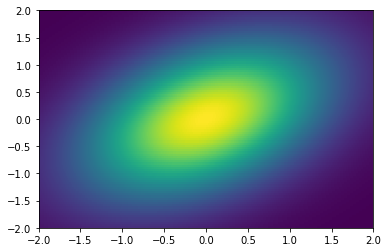

In [402]:
plt.pcolor(X,Y,z)

In [323]:
z_eigen = np.array(normal_dist(XYpairs, sigma_2, mu)).reshape(X.shape)

In [320]:
z.shape

(100, 1000)

In [324]:
z_eigen.shape

(100, 1000)

In [314]:
XYpairs.shape

(100000, 2)

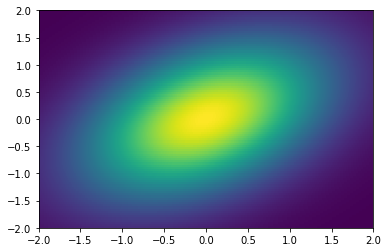

In [325]:
plt.pcolor(X,Y,z_eigen)

In [315]:
def multi_normal(x, Sigma, Mu):
    p = len(Mu)
    N = 1.0 / math.sqrt(((2 * math.pi)**p * np.linalg.det(Sigma)))
    exponent = - 0.5 * np.transpose(x - Mu) @ np.linalg.inv(Sigma) @ (x - Mu)
    E = np.exp(exponent)
    return N * E


def normal_dist(x, Sigma, Mu):
    if len(x.shape) == 1 and len(Mu) == 1:
        return uni_normal(x, Sigma, Mu)
    if len(x.shape) == 1:
        return multi_normal(x, Sigma, Mu)
    return [multi_normal(a, Sigma, Mu) for a in x]
    vfunc = np.vectorize(lambda a: multi_normal(a, Sigma, Mu))
    return vfunc(x)

In [ ]:
multi_normal(XYpairs[0], Sigma_1, )

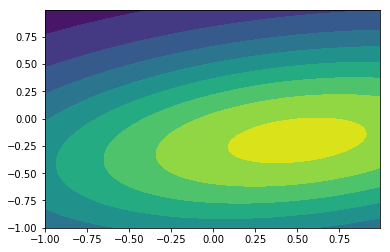

In [382]:
X,Y = np.mgrid[-1:1:.01, -1:1:.01]
XYpairs = np.stack([ X.reshape(-1), Y.reshape(-1) ], axis=1)
#pos = np.empty(x.shape + (2,))
#pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
z = rv.pdf(XYpairs).reshape(X.shape)
plt.contourf(X, Y, z)

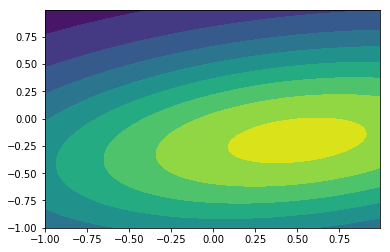

In [375]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
plt.contourf(x, y, rv.pdf(pos))

In [376]:
xypairs

array([[[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
        [-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
        [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
        ...,
        [ 0.97,  0.97,  0.97, ...,  0.97,  0.97,  0.97],
        [ 0.98,  0.98,  0.98, ...,  0.98,  0.98,  0.98],
        [ 0.99,  0.99,  0.99, ...,  0.99,  0.99,  0.99]],

       [[-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        ...,
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99],
        [-1.  , -0.99, -0.98, ...,  0.97,  0.98,  0.99]]])

In [377]:
z.shape

(100, 1000)

In [378]:
x.shape

(200, 200)

In [379]:
y.shape

(200, 200)

In [380]:
pos.shape

(200, 200, 2)

In [336]:
x

array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
       [-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
       [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
       ...,
       [ 0.97,  0.97,  0.97, ...,  0.97,  0.97,  0.97],
       [ 0.98,  0.98,  0.98, ...,  0.98,  0.98,  0.98],
       [ 0.99,  0.99,  0.99, ...,  0.99,  0.99,  0.99]])

In [335]:
pos

array([[[-1.  , -1.  ],
        [-1.  , -0.99],
        [-1.  , -0.98],
        ...,
        [-1.  ,  0.97],
        [-1.  ,  0.98],
        [-1.  ,  0.99]],

       [[-0.99, -1.  ],
        [-0.99, -0.99],
        [-0.99, -0.98],
        ...,
        [-0.99,  0.97],
        [-0.99,  0.98],
        [-0.99,  0.99]],

       [[-0.98, -1.  ],
        [-0.98, -0.99],
        [-0.98, -0.98],
        ...,
        [-0.98,  0.97],
        [-0.98,  0.98],
        [-0.98,  0.99]],

       ...,

       [[ 0.97, -1.  ],
        [ 0.97, -0.99],
        [ 0.97, -0.98],
        ...,
        [ 0.97,  0.97],
        [ 0.97,  0.98],
        [ 0.97,  0.99]],

       [[ 0.98, -1.  ],
        [ 0.98, -0.99],
        [ 0.98, -0.98],
        ...,
        [ 0.98,  0.97],
        [ 0.98,  0.98],
        [ 0.98,  0.99]],

       [[ 0.99, -1.  ],
        [ 0.99, -0.99],
        [ 0.99, -0.98],
        ...,
        [ 0.99,  0.97],
        [ 0.99,  0.98],
        [ 0.99,  0.99]]])

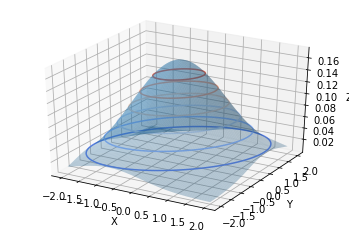

In [408]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
#X, Y, Z = axes3d.get_test_data(0.05)
X, Y, Z = X,Y,z
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='x', offset=-4, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='y', offset=4, cmap=cm.coolwarm)

ax.set_xlabel('X')
#ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
#ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
#ax.set_zlim(-100, 100)

plt.show()

array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
        -0.01319036, -0.0113957 ],
       [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
        -0.01530587, -0.01322338],
       [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
        -0.01771632, -0.01530587],
       ...,
       [-0.01200234, -0.01414685, -0.01660867, ...,  0.02918791,
         0.03019517,  0.03085725],
       [-0.01097235, -0.01288301, -0.01507265, ...,  0.01583738,
         0.01709512,  0.01804782],
       [-0.00988645, -0.01157475, -0.01350698, ...,  0.00702321,
         0.0083816 ,  0.00947216]])

## gen data

In [509]:
x = np.arange(0,10,0.5)
x_old = x[::2]
x_new = x[1::2]
y = np.sin(x_old)

In [510]:
print(x_old)
print(x_new)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


Text(0, 0.5, 'f(x)')

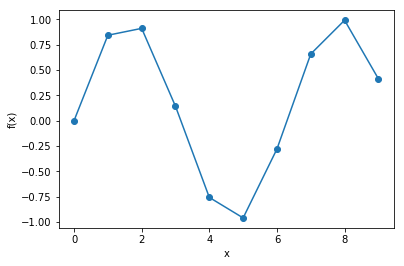

In [511]:
plt.plot(x_old,y,marker='o')
plt.xlabel('x')
plt.ylabel('f(x)')

In [420]:
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel

In [482]:
def rbf_ij(xi,xj,lmd=None):
    #return np.linalg.norm(xi)
    if not lmd:
        try:
            lmd = 1/len(xi)
        except: lmd = 1
    return np.exp(-lmd*np.linalg.norm(xi-xj)**2)

In [483]:
rbf_ij(4,6)

0.01831563888873418

In [484]:
rbf_ij(np.array([1,4]),np.array([1,2]))

0.1353352832366127

In [485]:
def cov_mat(x1,x2):
    rows = len(x1)
    cols = len(x2)
    cov = np.empty(shape=(rows,cols))
    for index in itertools.product(range(rows),range(cols)):
        cov[index] = rbf_ij(x1[index[0]],x2[index[1]])
    return cov

In [486]:
cov_mat(np.array([[1,2],[2,3]]),np.array([[1,2]]))

array([[1.        ],
       [0.36787944]])

In [488]:
rbf_kernel(np.array([[1,2],[2,3]]),np.array([[1,2]]))

array([[1.        ],
       [0.36787944]])

assumption:
$\vec{f} \sim N(\vec{\mu}, \bf{K} )$

In [502]:
Sigma = cov_mat(x_old,x_old)

In [503]:
Sigma.shape

(10, 10)

In [504]:
Sigma

array([[1.00000000e+00, 3.67879441e-01, 1.83156389e-02, 1.23409804e-04,
        1.12535175e-07, 1.38879439e-11, 2.31952283e-16, 5.24288566e-22,
        1.60381089e-28, 6.63967720e-36],
       [3.67879441e-01, 1.00000000e+00, 3.67879441e-01, 1.83156389e-02,
        1.23409804e-04, 1.12535175e-07, 1.38879439e-11, 2.31952283e-16,
        5.24288566e-22, 1.60381089e-28],
       [1.83156389e-02, 3.67879441e-01, 1.00000000e+00, 3.67879441e-01,
        1.83156389e-02, 1.23409804e-04, 1.12535175e-07, 1.38879439e-11,
        2.31952283e-16, 5.24288566e-22],
       [1.23409804e-04, 1.83156389e-02, 3.67879441e-01, 1.00000000e+00,
        3.67879441e-01, 1.83156389e-02, 1.23409804e-04, 1.12535175e-07,
        1.38879439e-11, 2.31952283e-16],
       [1.12535175e-07, 1.23409804e-04, 1.83156389e-02, 3.67879441e-01,
        1.00000000e+00, 3.67879441e-01, 1.83156389e-02, 1.23409804e-04,
        1.12535175e-07, 1.38879439e-11],
       [1.38879439e-11, 1.12535175e-07, 1.23409804e-04, 1.83156389e-02,
   

In [522]:
x_com = np.concatenate([x_old, x_new], axis=0)

In [523]:
x_com

array([0. , 1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. , 9. , 0.5, 1.5, 2.5,
       3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [524]:
y_old = y

In [525]:
y

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [526]:
K_com = cov_mat(x_com, x_com)

In [527]:
K_com

array([[1.00000000e+00, 3.67879441e-01, 1.83156389e-02, 1.23409804e-04,
        1.12535175e-07, 1.38879439e-11, 2.31952283e-16, 5.24288566e-22,
        1.60381089e-28, 6.63967720e-36, 7.78800783e-01, 1.05399225e-01,
        1.93045414e-03, 4.78511739e-06, 1.60522806e-09, 7.28772410e-14,
        4.47773244e-19, 3.72336312e-25, 4.19009319e-32, 6.38150345e-40],
       [3.67879441e-01, 1.00000000e+00, 3.67879441e-01, 1.83156389e-02,
        1.23409804e-04, 1.12535175e-07, 1.38879439e-11, 2.31952283e-16,
        5.24288566e-22, 1.60381089e-28, 7.78800783e-01, 7.78800783e-01,
        1.05399225e-01, 1.93045414e-03, 4.78511739e-06, 1.60522806e-09,
        7.28772410e-14, 4.47773244e-19, 3.72336312e-25, 4.19009319e-32],
       [1.83156389e-02, 3.67879441e-01, 1.00000000e+00, 3.67879441e-01,
        1.83156389e-02, 1.23409804e-04, 1.12535175e-07, 1.38879439e-11,
        2.31952283e-16, 5.24288566e-22, 1.05399225e-01, 7.78800783e-01,
        7.78800783e-01, 1.05399225e-01, 1.93045414e-03, 4.7851

In [507]:
x_new.shape

()

In [559]:
x_new[0]

0.5

In [560]:
K_old = cov_mat(x_old, x_old)

In [586]:
K_star = cov_mat(x_old, [0.5, 0.3])

In [587]:
K_star

array([[7.78800783e-01, 9.13931185e-01],
       [7.78800783e-01, 6.12626394e-01],
       [1.05399225e-01, 5.55762126e-02],
       [1.93045414e-03, 6.82328053e-04],
       [4.78511739e-06, 1.13372714e-06],
       [1.60522806e-09, 2.54938188e-10],
       [7.28772410e-14, 7.75840208e-15],
       [4.47773244e-19, 3.19536672e-20],
       [3.72336312e-25, 1.78106663e-26],
       [4.19009319e-32, 1.34354020e-33]])

In [598]:
cov_mat(x_old, [0.5])

array([[7.78800783e-01],
       [7.78800783e-01],
       [1.05399225e-01],
       [1.93045414e-03],
       [4.78511739e-06],
       [1.60522806e-09],
       [7.28772410e-14],
       [4.47773244e-19],
       [3.72336312e-25],
       [4.19009319e-32]])

In [603]:
K_star[:,0].reshape(-1,1)

array([[7.78800783e-01],
       [7.78800783e-01],
       [1.05399225e-01],
       [1.93045414e-03],
       [4.78511739e-06],
       [1.60522806e-09],
       [7.28772410e-14],
       [4.47773244e-19],
       [3.72336312e-25],
       [4.19009319e-32]])

In [588]:
y_exp = K_star.T @ np.linalg.inv(K_old) @ y_old

In [589]:
y_new = np.sin([0.5, 0.3])

In [607]:
sigma_star =  - K_star[:,0].reshape(-1,1).T @ np.linalg.inv(K_old) @ K_star[:,0].reshape(-1,1) + 1

In [608]:
sigma_star.shape

(1, 1)

In [609]:
y_new

array([0.47942554, 0.29552021])

In [610]:
y_exp

array([0.40714865, 0.22090251])

In [611]:
sigma_star

array([[0.0955578]])

In [614]:
L = np.linalg.cholesky(K_old)

In [617]:
f_prior = np.dot(L, np.random.normal(size=(10,10)))

In [618]:
f_prior

array([[-2.20359913, -1.91298991,  0.01678409,  1.76167776, -0.53533004,
        -1.80410295, -1.20766038,  1.74097355, -0.94243167,  0.5410315 ],
       [-1.01719727, -0.38742492,  0.67137273,  0.6701424 ,  0.24530331,
        -0.38142274, -0.09452976,  0.41631655, -1.09092985,  0.98826656],
       [ 0.673779  ,  0.68102031, -0.51126754,  0.15248549, -0.6040919 ,
         0.57588547,  0.63298972,  0.97624765, -0.85137515,  1.28950942],
       [ 0.48961416,  0.43089857,  0.57247152,  0.71613414, -1.16382132,
         1.02718987, -0.09636795,  1.28040981, -0.13393935,  2.32379245],
       [ 1.03191258,  1.62330293,  0.017685  ,  0.0874442 ,  1.01370706,
         1.19675995,  0.32929887, -0.73066773, -0.72923171,  3.21169902],
       [ 0.4164431 ,  0.61107798, -0.28507687, -0.70635902,  0.71605218,
         1.32016984, -0.68204242, -0.17985731, -1.35274122,  1.85806821],
       [-0.14086696, -0.38570281, -0.00640713,  0.39134225, -0.51470269,
        -0.59906043,  0.49438787,  1.39501815

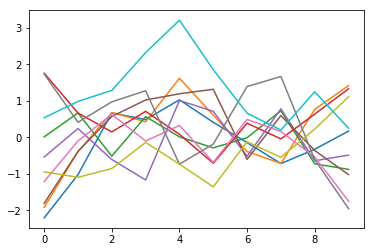

In [620]:
plt.plot(x_old, f_prior)

- combine prior with data
- prior knowledge assumes that function is smooth
$D=(x1,y1),.. etc$
$p(f\vert D) = 1/p(D) p(D \vert f) p(f)$